In [35]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [383]:
file = "Fruit-Prices-2022.csv"
data = pd.read_csv(file)
print(data.columns)
print(data)
#first lets take a look at what kinds of data we have
#at a glance, it looks like the columns we care about for final analysis will be
#Fruit, Form, and CupEquivalentPrice 
#(since the other 5 columns apear to be used to calculate CupEquivalentPrice)


Index(['Fruit', 'Form', 'RetailPrice', 'RetailPriceUnit', 'Yield',
       'CupEquivalentSize', 'CupEquivalentUnit', 'CupEquivalentPrice'],
      dtype='object')
                         Fruit    Form  RetailPrice RetailPriceUnit  Yield  \
0                       Apples   Fresh       1.8541       per pound   0.90   
1           Apples, applesauce  Canned       1.1705       per pound   1.00   
2       Apples, ready-to-drink   Juice       0.8699        per pint   1.00   
3   Apples, frozen concentrate   Juice       0.6086        per pint   1.00   
4                     Apricots   Fresh       3.6162       per pound   0.93   
..                         ...     ...          ...             ...    ...   
57                 Raspberries   Fresh       7.7338       per pound   0.96   
58                 Raspberries  Frozen       6.1590       per pound   1.00   
59                Strawberries   Fresh       2.9682       per pound   0.94   
60                Strawberries  Frozen       3.3421       p

In [407]:
data = data.drop(columns=['RetailPrice','RetailPriceUnit', 'Yield', 'CupEquivalentSize',
       'CupEquivalentUnit'])
print(data.columns)

Index(['Fruit', 'Form', 'CupEquivalentPrice'], dtype='object')


In [242]:
#it looks like some fruits have multiple different labels in the Fruit column, let's see how widespread this is
print(data["Fruit"].values)
#we'll clean this up in a moment, but let's compare our other two columns for now

['Apples' 'Apples, applesauce' 'Apples, ready-to-drink'
 'Apples, frozen concentrate' 'Apricots' 'Apricots, packed in juice'
 'Apricots, packed in syrup or water' 'Apricots' 'Bananas'
 'Berries, mixed' 'Blackberries' 'Blackberries' 'Blueberries'
 'Blueberries' 'Cantaloupe' 'Cherries'
 'Cherries, packed in syrup or water' 'Clementines' 'Cranberries' 'Dates'
 'Figs' 'Fruit cocktail, packed in juice'
 'Fruit cocktail, packed in syrup or water' 'Grapefruit'
 'Grapefruit, ready-to-drink' 'Grapes' 'Grapes (raisins)'
 'Grapes, ready-to-drink' 'Grapes, frozen concentrate' 'Honeydew' 'Kiwi'
 'Mangoes' 'Mangoes' 'Nectarines' 'Oranges' 'Oranges, ready-to-drink'
 'Oranges, frozen concentrate' 'Papaya' 'Papaya' 'Peaches'
 'Peaches, packed in juice' 'Peaches, packed in syrup or water' 'Peaches'
 'Pears' 'Pears, packed in juice' 'Pears, packed in syrup or water'
 'Pineapple' 'Pineapple, packed in juice'
 'Pineapple, packed in syrup or water' 'Pineapple'
 'Pineapple, ready-to-drink' 'Pineapple, frozen

<AxesSubplot:xlabel='Form', ylabel='cost per cup equivalent'>

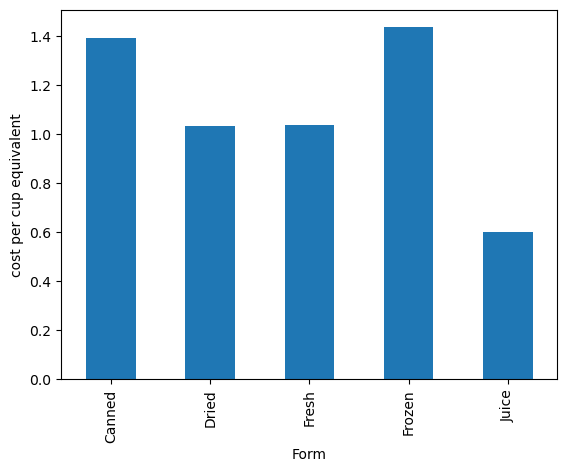

In [244]:
byForm = data.groupby("Form") #form here refers to state, ie fresh, frozen, juice, etc
byForm["CupEquivalentPrice"].mean().plot.bar(ylabel="cost per cup equivalent")
#this should get us an idea of relative costs per serving of fruit

CupEquivalentPrice    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

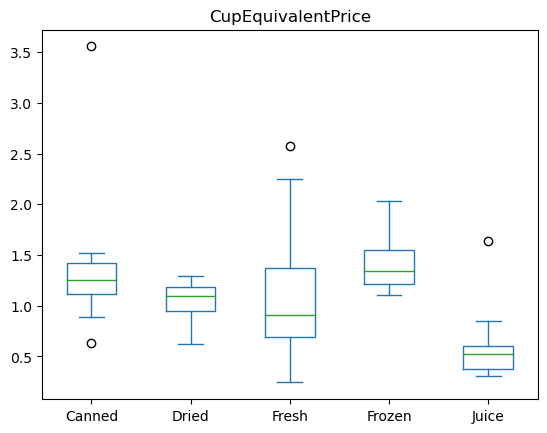

In [246]:
data.plot.box(column=["CupEquivalentPrice"], by="Form")
#getting a bit more granular
#here we can see that juice is the cheapest overall, 
#half of fresh fruits are still at under $1 per cup
#the other half of fresh fruits have a much wider spread in price
#leading to the slightly higher mean we saw previously

In [409]:
#let's check we have a similar amount of entries for each category
#in looking at the values for Fruit, we see some fruits don't have entries for every form
#first we'll need to remove some extra information from some names
#for now, we'll just care about the type of fruit




#TODO: with python, probably a better way to do this
fruits = data["Fruit"].values
for i in range(len(fruits)):
    for j in range(len(fruits[i])):
        if fruits[i][j] == ',' or fruits[i][j] == ' ':
            fruits[i] = fruits[i][:j]
            break
print(data["Fruit"].values)


['Apples' 'Apples' 'Apples' 'Apples' 'Apricots' 'Apricots' 'Apricots'
 'Apricots' 'Blackberries' 'Blackberries' 'Blueberries' 'Blueberries'
 'Cherries' 'Cherries' 'Fruit' 'Fruit' 'Grapefruit' 'Grapefruit' 'Grapes'
 'Grapes' 'Grapes' 'Grapes' 'Mangoes' 'Mangoes' 'Oranges' 'Oranges'
 'Oranges' 'Papaya' 'Papaya' 'Peaches' 'Peaches' 'Peaches' 'Peaches'
 'Pears' 'Pears' 'Pears' 'Pineapple' 'Pineapple' 'Pineapple' 'Pineapple'
 'Pineapple' 'Pineapple' 'Plum' 'Plum' 'Plum' 'Pomegranate' 'Pomegranate'
 'Raspberries' 'Raspberries' 'Strawberries' 'Strawberries']


In [411]:
#let's focus on fruits with at least 2 entries
data2 = data.drop_duplicates(subset="Fruit", keep=False)

for i in data2.index:
    data = data.drop(index=i)
print(data["Fruit"].values)

['Apples' 'Apples' 'Apples' 'Apples' 'Apricots' 'Apricots' 'Apricots'
 'Apricots' 'Blackberries' 'Blackberries' 'Blueberries' 'Blueberries'
 'Cherries' 'Cherries' 'Fruit' 'Fruit' 'Grapefruit' 'Grapefruit' 'Grapes'
 'Grapes' 'Grapes' 'Grapes' 'Mangoes' 'Mangoes' 'Oranges' 'Oranges'
 'Oranges' 'Papaya' 'Papaya' 'Peaches' 'Peaches' 'Peaches' 'Peaches'
 'Pears' 'Pears' 'Pears' 'Pineapple' 'Pineapple' 'Pineapple' 'Pineapple'
 'Pineapple' 'Pineapple' 'Plum' 'Plum' 'Plum' 'Pomegranate' 'Pomegranate'
 'Raspberries' 'Raspberries' 'Strawberries' 'Strawberries']


In [ ]:
#there's also the Fruit Cocktail entries, which are both canned
#we may want to remove these later

CupEquivalentPrice    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

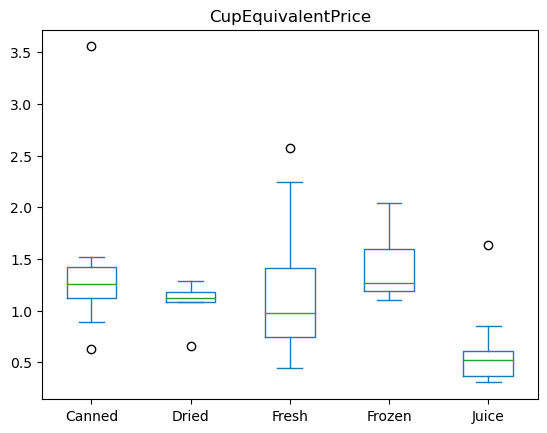

In [224]:
data.plot.box(column=["CupEquivalentPrice"], by="Form")

In [264]:
#ideally we want to compare the price between forms within each type of fruit
print("minimums:")
print(data.groupby("Fruit").min().value_counts("Form"))
print("maximums:")
print(data.groupby("Fruit").max().value_counts("Form"))
#there's some information in just looking at the common forms for the high and low end of each fruit,
#however not much can be said here since there is an uneven distribution of types

minimums:
Form
Fresh     14
Canned     7
Dried      7
Frozen     1
Name: count, dtype: int64
maximums:
Form
Fresh     12
Juice      7
Frozen     6
Dried      3
Canned     1
Name: count, dtype: int64


In [389]:
data = data.sort_values(["Fruit", "CupEquivalentPrice"]).reset_index()
data = data.drop(columns=['index'])
#TODO:
#impliment a method to rank each form on how it costs
#relative to other forms within each fruit
#could use a point system with each entry gaining or losing points
#based on its position relative to that fruit's median,
#with the median scoring zero
#to theoretically limit bias based on quantity of entries
#to follow with this, the minimum and maximum should each recieve a fixed number of points
#with other entries recieving score propertional to their ordinal placement

In [458]:
currFruit = ""
currForms = [] # list in order encountered, from cheapest to most expensive
scores = {}
for form in ["Canned", "Dried", "Fresh", "Frozen", "Juice"]:
    scores[form] = 0
for i in data.itertuples():
    if i.Fruit!=currFruit:
        for j in range(len(currForms)):
            degFree = len(currForms)-1 #degrees of freedom for ranking
            points = (degFree-j)/degFree #gives us a value between 1 and 0, inclusive
            points = points - 0.5 #shifts the scale to between 0.5 and -0.5 inclusive
            scores[currForms[j]] += points
        currForms = []
        currFruit = i.Fruit
    currForms.append(i.Form)
print(scores)
#higher scores reflect forms that are cheaper between forms within fruit types

{'Canned': -2.766666666666667, 'Dried': -1.8, 'Fresh': -0.03333333333333344, 'Frozen': 1.6666666666666665, 'Juice': 2.933333333333333}
